In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'ecommerce_client.csv')
data.head()

,e-mail,address,membership_image,mean_session_length,time_spent_app,time_spent_website,length_of_membership,annual_amount_spent
0,jessica04@christian-riley.com,"338 Graham Loaf Suite 236\nEast Toddton, FM 43...",LemonChiffon,34.497268,12.655651,39.577668,4.082621,587.951054
1,simmonsmartin@hardy.com,"2302 Joshua Park\nMillerbury, WA 30239-8144",MediumVioletRed,31.926272,11.109461,37.268959,2.664034,392.204933
2,michellejohnson@sanders-rodriguez.com,"70562 Gonzalez Stravenue\nElizabethland, WI 40...",Teal,33.000915,11.330278,37.110597,4.104543,487.547505
3,tylerhernandez@barton.info,"7613 Miguel Knoll Suite 762\nWest Katherine, W...",SlateGray,34.305557,13.717514,36.721283,3.120179,581.852344
4,connerjoseph@gmail.com,"981 David Square\nNew Jacquelinetown, AK 66018...",Turquoise,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
data.describe()

,mean_session_length,time_spent_app,time_spent_website,length_of_membership,annual_amount_spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   e-mail                500 non-null    object 
 1   address               500 non-null    object 
 2   membership_image      500 non-null    object 
 3   mean_session_length   500 non-null    float64
 4   time_spent_app        500 non-null    float64
 5   time_spent_website    500 non-null    float64
 6   length_of_membership  500 non-null    float64
 7   annual_amount_spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 35.2+ KB


### Time spent on Website  , App &  Annual Amount . Does the correlation makes sense?

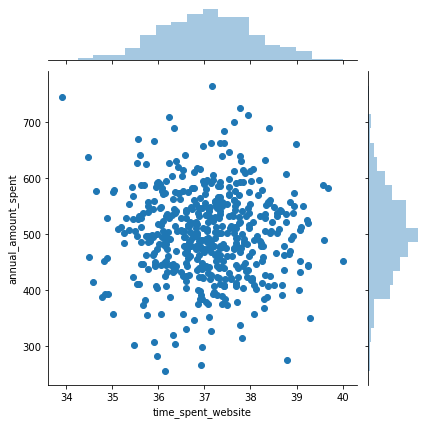

In [6]:
sns.jointplot(data = data , x= 'time_spent_website' , y = 'annual_amount_spent')

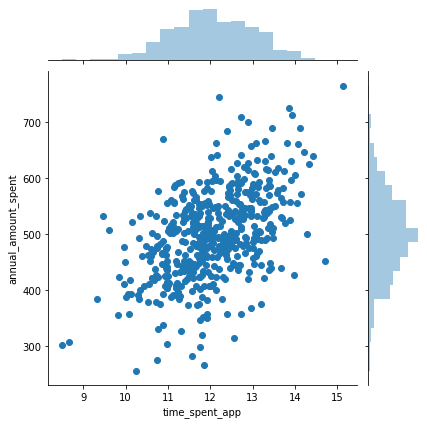

In [7]:
sns.jointplot(data = data , x= 'time_spent_app' , y = 'annual_amount_spent')

### Time spent on App & Length of Membership ?

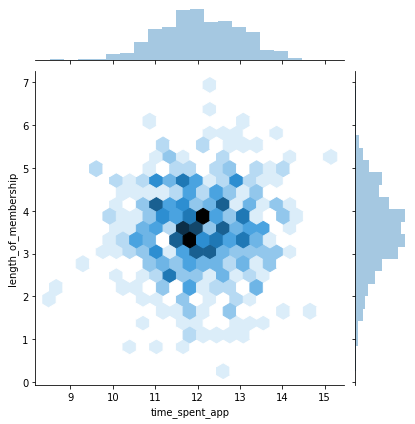

In [9]:
sns.jointplot(data = data , x= 'time_spent_app' , y = 'length_of_membership' , kind = 'hex')

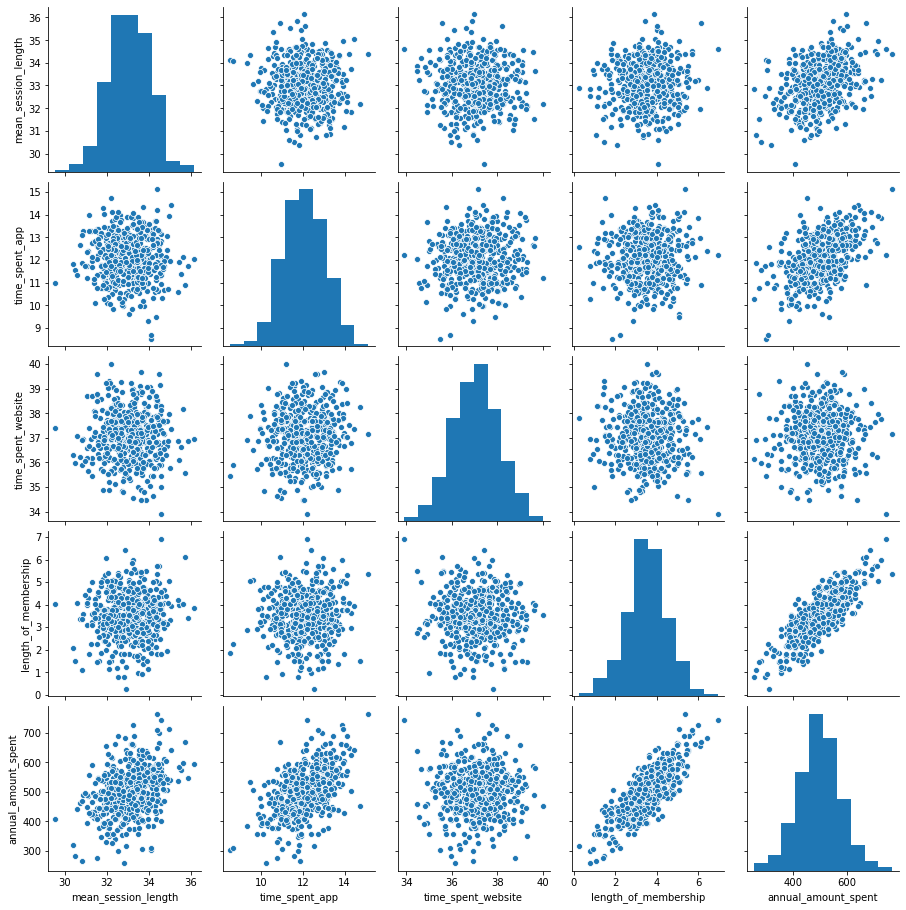

In [10]:
sns.pairplot(data)

### Length of Membership looks so linear with Annual Amount Spent

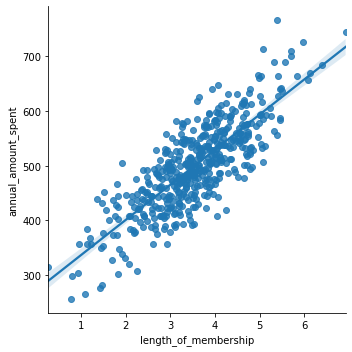

In [12]:
sns.lmplot(data = data , y= 'annual_amount_spent' , x = 'length_of_membership')

In [13]:
y = data[['annual_amount_spent']]
y.head()

,annual_amount_spent
0,587.951054
1,392.204933
2,487.547505
3,581.852344
4,599.406092


In [33]:
x = data.drop(['annual_amount_spent' , 'address' , 'e-mail' , 'membership_image'] , axis = 1)
x.head()

,mean_session_length,time_spent_app,time_spent_website,length_of_membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [45]:
from sklearn.model_selection import train_test_split

X_Train , X_Test , Y_Train , Y_Test = train_test_split(x , y , test_size = 0.3 , random_state = 101)

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lr = LinearRegression()
model = lr.fit(X_Train , Y_Train)
model.score(X_Test , Y_Test)

0.9890046246741234

In [49]:
model.coef_

array([[26.04265125, 36.67425683,  0.18503853, 60.20236045]])

In [51]:
pred = model.predict(X_Test)

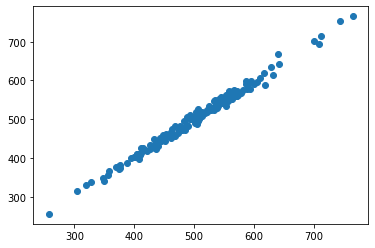

In [52]:
plt.scatter(Y_Test , pred)

In [53]:
import sklearn.metrics as sm

In [54]:
sm.mean_absolute_error(Y_Test , pred)

7.22814865343085

In [55]:
sm.mean_squared_error(Y_Test , pred)

79.81305165097453

In [56]:
np.sqrt(sm.mean_squared_error(Y_Test , pred))

8.933815066978639

In [58]:
np.mean(data['annual_amount_spent'])

499.3140382585909

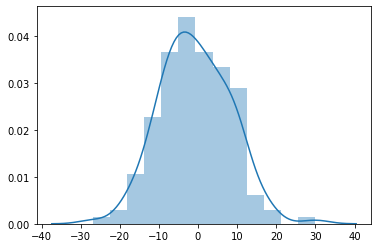

In [59]:
sns.distplot((Y_Test - pred))

In [60]:
pd.DataFrame(model.coef_.reshape(4,1) , x.columns , columns = ['Coeff'])

,Coeff
mean_session_length,26.042651
time_spent_app,36.674257
time_spent_website,0.185039
length_of_membership,60.202360
